In [1]:
import networkx as nx
import utils as utl
import solvers as sls
import matplotlib.pyplot as plt

In [2]:
loader = utl.Loader()
loader.readFile('TSP_datasets/berlin52.tsp')

In [3]:
G = loader.createNxGraph()

In [4]:
G.nodes(data=True)

NodeDataView({0: {'pos': array([565., 575.])}, 1: {'pos': array([ 25., 185.])}, 2: {'pos': array([345., 750.])}, 3: {'pos': array([945., 685.])}, 4: {'pos': array([845., 655.])}, 5: {'pos': array([880., 660.])}, 6: {'pos': array([ 25., 230.])}, 7: {'pos': array([ 525., 1000.])}, 8: {'pos': array([ 580., 1175.])}, 9: {'pos': array([ 650., 1130.])}, 10: {'pos': array([1605.,  620.])}, 11: {'pos': array([1220.,  580.])}, 12: {'pos': array([1465.,  200.])}, 13: {'pos': array([1530.,    5.])}, 14: {'pos': array([845., 680.])}, 15: {'pos': array([725., 370.])}, 16: {'pos': array([145., 665.])}, 17: {'pos': array([415., 635.])}, 18: {'pos': array([510., 875.])}, 19: {'pos': array([560., 365.])}, 20: {'pos': array([300., 465.])}, 21: {'pos': array([520., 585.])}, 22: {'pos': array([480., 415.])}, 23: {'pos': array([835., 625.])}, 24: {'pos': array([975., 580.])}, 25: {'pos': array([1215.,  245.])}, 26: {'pos': array([1320.,  315.])}, 27: {'pos': array([1250.,  400.])}, 28: {'pos': array([660.,

In [5]:
G.edges(data=True)

EdgeDataView([(0, 1, {'weight': 666.1080993352356}), (0, 2, {'weight': 281.1138559374119}), (0, 3, {'weight': 395.60080889704966}), (0, 4, {'weight': 291.20439557122074}), (0, 5, {'weight': 326.266762021509}), (0, 6, {'weight': 640.8002808988149}), (0, 7, {'weight': 426.8782027698299}), (0, 8, {'weight': 600.1874707122766}), (0, 9, {'weight': 561.4712815451918}), (0, 10, {'weight': 1040.9731024382907}), (0, 11, {'weight': 655.0190836914601}), (0, 12, {'weight': 975.0}), (0, 13, {'weight': 1120.7698247187066}), (0, 14, {'weight': 299.0401310861136}), (0, 15, {'weight': 260.0480724789169}), (0, 16, {'weight': 429.53463189829057}), (0, 17, {'weight': 161.55494421403512}), (0, 18, {'weight': 305.0}), (0, 19, {'weight': 210.05951537600004}), (0, 20, {'weight': 286.9233347080715}), (0, 21, {'weight': 46.09772228646444}), (0, 22, {'weight': 181.1767093199344}), (0, 23, {'weight': 274.5906043549196}), (0, 24, {'weight': 410.03048667141815}), (0, 25, {'weight': 728.9718787443038}), (0, 26, {'we

In [6]:
weights = nx.get_edge_attributes(G, 'weight')

In [7]:
weights[(0,21)]

46.09772228646444

In [8]:
weights

{(0, 1): 666.1080993352356,
 (0, 2): 281.1138559374119,
 (0, 3): 395.60080889704966,
 (0, 4): 291.20439557122074,
 (0, 5): 326.266762021509,
 (0, 6): 640.8002808988149,
 (0, 7): 426.8782027698299,
 (0, 8): 600.1874707122766,
 (0, 9): 561.4712815451918,
 (0, 10): 1040.9731024382907,
 (0, 11): 655.0190836914601,
 (0, 12): 975.0,
 (0, 13): 1120.7698247187066,
 (0, 14): 299.0401310861136,
 (0, 15): 260.0480724789169,
 (0, 16): 429.53463189829057,
 (0, 17): 161.55494421403512,
 (0, 18): 305.0,
 (0, 19): 210.05951537600004,
 (0, 20): 286.9233347080715,
 (0, 21): 46.09772228646444,
 (0, 22): 181.1767093199344,
 (0, 23): 274.5906043549196,
 (0, 24): 410.03048667141815,
 (0, 25): 728.9718787443038,
 (0, 26): 798.5142453331688,
 (0, 27): 707.0007072132248,
 (0, 28): 406.2634613154375,
 (0, 29): 360.06943774777665,
 (0, 30): 146.37281168304446,
 (0, 31): 90.55385138137417,
 (0, 32): 827.3149339882606,
 (0, 33): 135.09256086106296,
 (0, 34): 121.6552506059644,
 (0, 35): 125.0,
 (0, 36): 207.966343

In [9]:
tsp = sls.TSP()
tsp.NN(G)

0.0006964206695556641

In [10]:
tsp.hamiltonian_cost

8980.91827932919

In [11]:
H = tsp.toNetworkX(G)

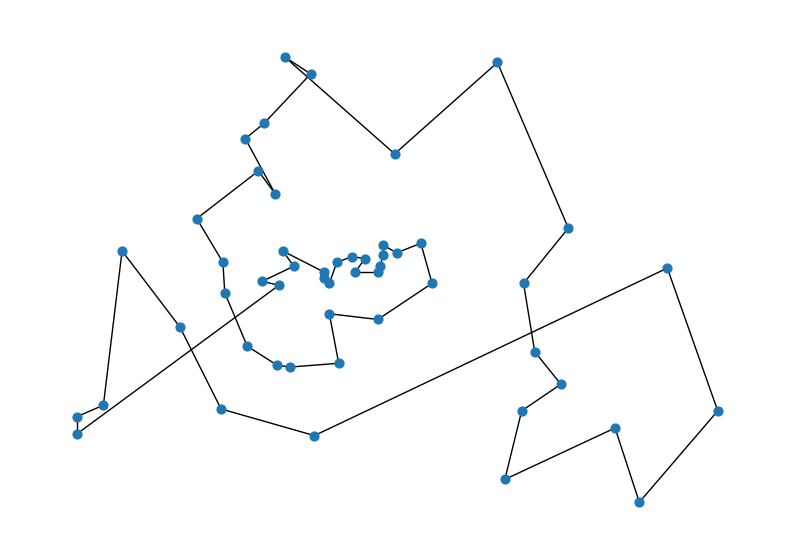

In [12]:
utlt = utl.Utilities()
utlt.draw(H)

In [13]:
tsp.repNN(G)

0.1094212532043457

In [14]:
tsp.hamiltonian_cost

8182.191555725674

In [15]:
H = tsp.toNetworkX(G)

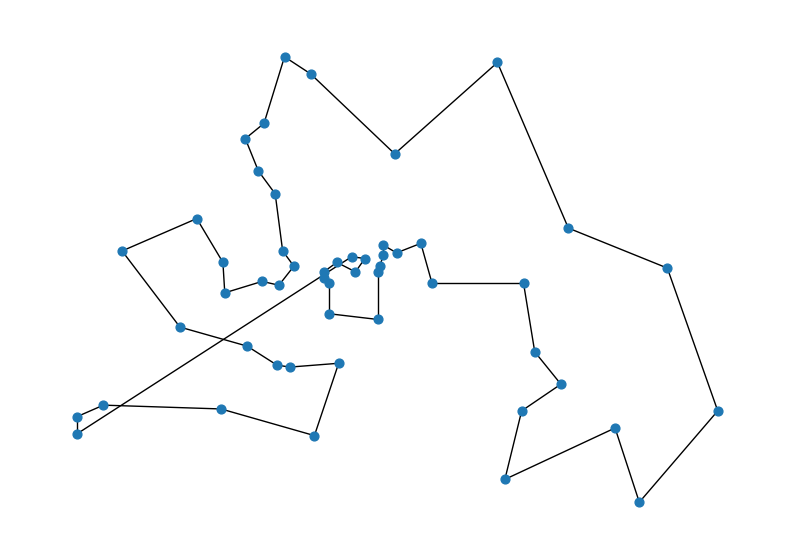

In [16]:
utlt.draw(H)

In [17]:
tsp.threeOpt(G)

KeyboardInterrupt: 

In [ ]:
tsp.hamiltonian_cost

588.9894662219732

In [ ]:
H = tsp.toNetworkX(G)

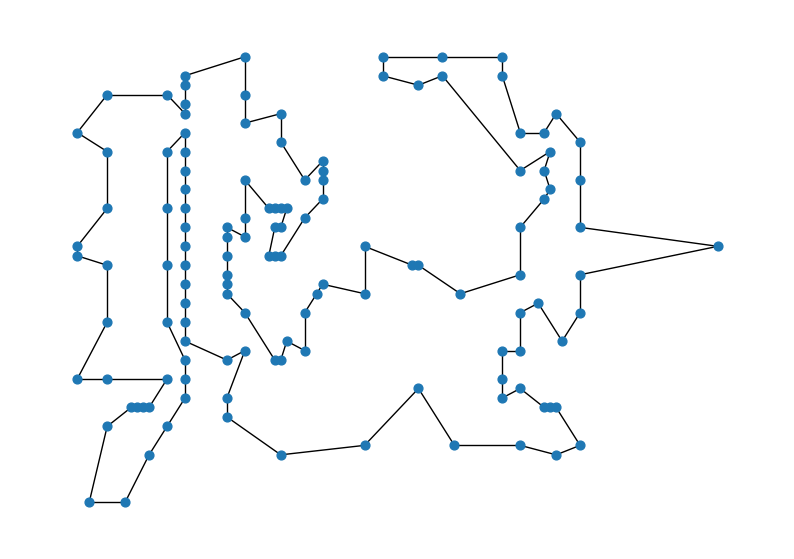

In [ ]:
utlt.draw(H)

In [ ]:
weights = nx.get_edge_attributes(H, 'weight')
sum(list(weights.values()))

588.9894662219732